1 MNIST

1.1 NIST

1.2 MNIST

2 using PCA and kNN

2.1 데이터 읽기

In [2]:
import pandas as pd

df_train = pd.read_csv('../EDA/data/mnist_train.csv')
df_test = pd.read_csv('../EDA/data/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2.3 test 데이터의 생긴 모양

In [5]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2.4 데이터 정리

In [7]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

2.5 근데 어떻게 생긴 데이터인지 확인해볼까

In [10]:
import random 

samples = random.choices(population=range(0, 60000), k=16)
samples

[11219,
 56762,
 6497,
 25522,
 48582,
 28680,
 52269,
 20117,
 6511,
 22723,
 5060,
 15525,
 28112,
 43139,
 25541,
 44614]

2.6 random하게 16개만~

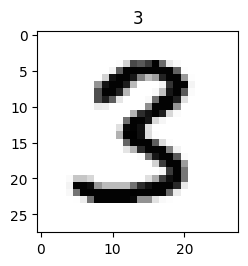

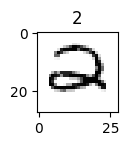

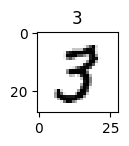

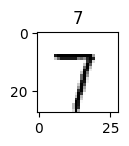

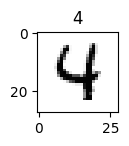

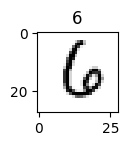

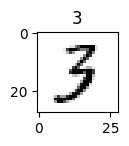

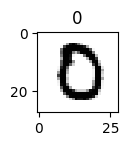

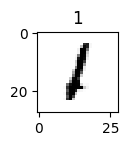

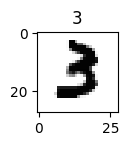

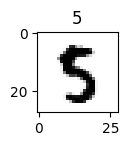

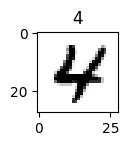

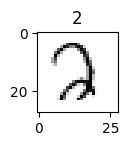

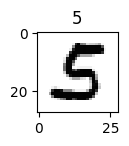

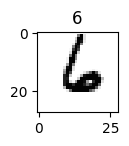

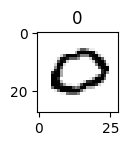

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx +1)
    plt.imshow(X_train[n].reshape(28,28),cmap ='Greys', interpolation ='nearest')
    plt.title(y_train[n])

    plt.show()

2.8 일단 fit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time